In [2]:
from my_umap import UMAP
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()
#print(penguins.head())
penguin_data = penguins[
[
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [4]:
myUmap = UMAP(n_neighbors = 30, dims=2, min_dist=.1, epochs=1000)
myUmap.fit(scaled_penguin_data)

getting neighbors
Tue Nov 16 17:54:14 2021 Building RP forest with 6 trees
Tue Nov 16 17:54:15 2021 NN descent for 8 iterations
	 1  /  8
	 2  /  8
	 3  /  8
	Stopping threshold met -- exiting after 3 iterations
done getting neighbors


/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


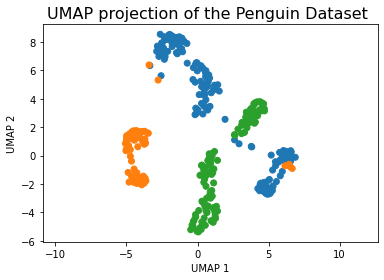

In [5]:
embedding = myUmap.Y
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin Dataset ', fontsize=16)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

Run with pre computed k neighbors

In [6]:

myUmap.fit(scaled_penguin_data, True)

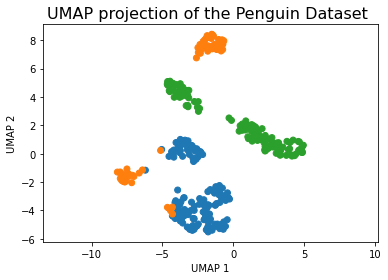

In [ ]:
embedding = myUmap.Y
plt.scatter(
embedding[:, 0],
embedding[:, 1],
c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin Dataset ', fontsize=16)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()